# House Loan Eligibility Prediction


### Domain:
 - Finance and Banking.
 
### Context:
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customers first apply for a home loan after that company manually validates the customer eligibility for loan. 
Company wants to automate the loan eligibility process based on customer detail provided while filling the details online. 
They need a web application where a user can access their website and register, login, and enter the required details such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others for checking the eligibility for the home loan.
    

### Project Objective:
1) This is a standard supervised classification task. A classification problem where we have to predict whether a customer is eligible for loan or not based on a given set of independent variable(s).

2) To build a Python Flask ML application where a user has to get registered by entering the username and password and login to the website and then enter their details to check whether they are eligible for loan or not.


### Dataset Description:
Dataset can be found here: https://www.kaggle.com/datasets/ssiddharth408/loan-prediction-dataset

1. **Loan ID**: Unique Loan ID
2. **Gender**: Male or Female
3. **Married**: Applicant married (Y/N)
4. **Dependents**: Number of dependents
5. **Self employed**: Self employed (Y/N)
6. **Education**: Graduate/Undergraduate
7. **Applicant Income**: Applicant income (in dollars)
8. **Co Applicant Income**: Co Applicant Income (in dollars)
9. **Loan Amount**: Loan amount in thousands (in dollars)
10. **Loan Amount Term**: Term of loan in months
11. **Credit History**: Credit history meets guidelines Yes/No(1/0)
12. **Property area**: Urban/Semi Urban/Rural
13. **Loan Status (Target)**: Loan Approved (Y/N)

### Model Building and saving the model using Pickle

#### 1. Import required libraries and read the dataset.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Reading the dataset:
df = pd.read_csv('loan_approval_data.csv')
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


#### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
# Checking few samples:
df.sample(5)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
584,lp002911,male,yes,1.0,graduate,no,2787,1917.0,146.0,360.0,0.0,rural,n
238,lp001790,female,no,1.0,graduate,no,3812,0.0,112.0,360.0,1.0,rural,y
441,lp002409,male,yes,0.0,graduate,no,7901,1833.0,180.0,360.0,1.0,rural,y
432,lp002386,male,no,0.0,graduate,NaN,12876,0.0,405.0,360.0,1.0,semiurban,y


In [4]:
# Checking the shape of the dataset:
df.shape

(614, 13)

In [5]:
# Checking the basic information of the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


#### Inferences:
- **Dataset Size**: Contains 614 entries across 13 columns.
- **Column Types**: 7 categorical columns(object type) and 6 numerical columns(float64 and int64 types).
- **Missing Values**: Several columns have missing data, with varying degrees of incompleteness.
- Columns with missing values include 'gender', 'married', 'dependents', 'self_employed', 'loanamount', 'loan_amount_term', and 'credit_history'.

In [6]:
# Checking statistical summary of numerical columns:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dependents,599.0,0.762938,1.015216,0.0,0.0,0.0,2.00,3.0
applicantincome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
coapplicantincome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
loanamount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
loan_amount_term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
credit_history,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


#### Obseravtions:
1. **Dependents**: Mean: 0.76, Std: 1.02, Range: 0 to 3. The majority have fewer dependents, mostly 0.
2. **Applicant Income**: Mean: $5403.46, Std: $6109.04, Range: $150 to $81,000. Wide variation in income levels.
3. **Coapplicant Income**: Mean: $1621.25, Std: $2926.25, Range: $0 to $41,667. The majority have lower incomes compared to applicants.
4. **Loan Amount**: Mean: $146.41k, Std: $85.59k, Range: $9k to $700k. Significant variability in loan amounts.
5. **Loan Amount Term**: Mean: 342 months (approx. 28.5 years), Std: 65.12 months. Most loans are for long terms, with the majority being around 30 years.
6. **Credit History**: Mean: 0.84, Std: 0.36, Range: 0 to 1. Most applicants have a credit history meeting guidelines.

In [7]:
# Checking statistical summary of categorical columns:
df.describe(include = 'O').T

,count,unique,top,freq
loan_id,614,614,lp001002,1
gender,601,2,male,489
married,611,2,yes,398
education,614,2,graduate,480
self_employed,582,2,no,500
property_area,614,3,semiurban,233
loan_status,614,2,y,422


#### Observations:
1. **Loan ID**: All entries are unique, indicating a unique identifier for each loan application.
2. **Gender**: The majority of applicants are male (489 out of 601).
3. **Married**: Most applicants are married (398 out of 611).
4. **Education**: The majority of applicants are graduates (480 out of 614).
5. **Self Employed**: Most applicants are not self-employed (500 out of 582).
6. **Property Area**: The most common property area is semiurban (233 out of 614).
7. **Loan Status**: The majority of loans are approved (422 out of 614).

#### 3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features.

In [8]:
# Calculating the percentage of missing values for each column in the DataFrame:
df.isnull().sum()/len(df)*100

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

In [9]:
# Handling missing data in numerical columns by replacing values with median:
df['dependents'].fillna(df['dependents'].median(), inplace=True)
df['loanamount'].fillna(df['loanamount'].median(), inplace=True)
df['loan_amount_term'].fillna(df['loan_amount_term'].median(), inplace=True)
df['credit_history'].fillna(df['credit_history'].median(), inplace=True)

In [10]:
# Handling missing data in categorical columns by replacing values with mode:
df['gender'].fillna(df['gender'].mode()[0],inplace=True)
df['married'].fillna(df['married'].mode()[0],inplace=True)
df['self_employed'].fillna(df['self_employed'].mode()[0],inplace=True)

In [11]:
# Converting credit_history column to Integer datatype
df['credit_history'] = df['credit_history'].astype(int)

In [12]:
# Removing redundant column 'loan_id' as it does not contribute to our analysis
df.drop(['loan_id'], axis=1, inplace=True)

In [13]:
# Checking for any remaining missing values after imputation and expressing the results as percentages:
df.isnull().sum()/len(df)*100

gender               0.0
married              0.0
dependents           0.0
education            0.0
self_employed        0.0
applicantincome      0.0
coapplicantincome    0.0
loanamount           0.0
loan_amount_term     0.0
credit_history       0.0
property_area        0.0
loan_status          0.0
dtype: float64

- We can observe that there are no remaining missing values in the dataset, indicating that all missing values have been successfully handled through imputation methods.

In [14]:
# Checking the dimensions of the dataset after dropping redundant columns and imputations
df.shape

(614, 12)

- The dataset consists of 614 rows and 12 columns after dropping redundant columns and performing imputations.

#### 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations.

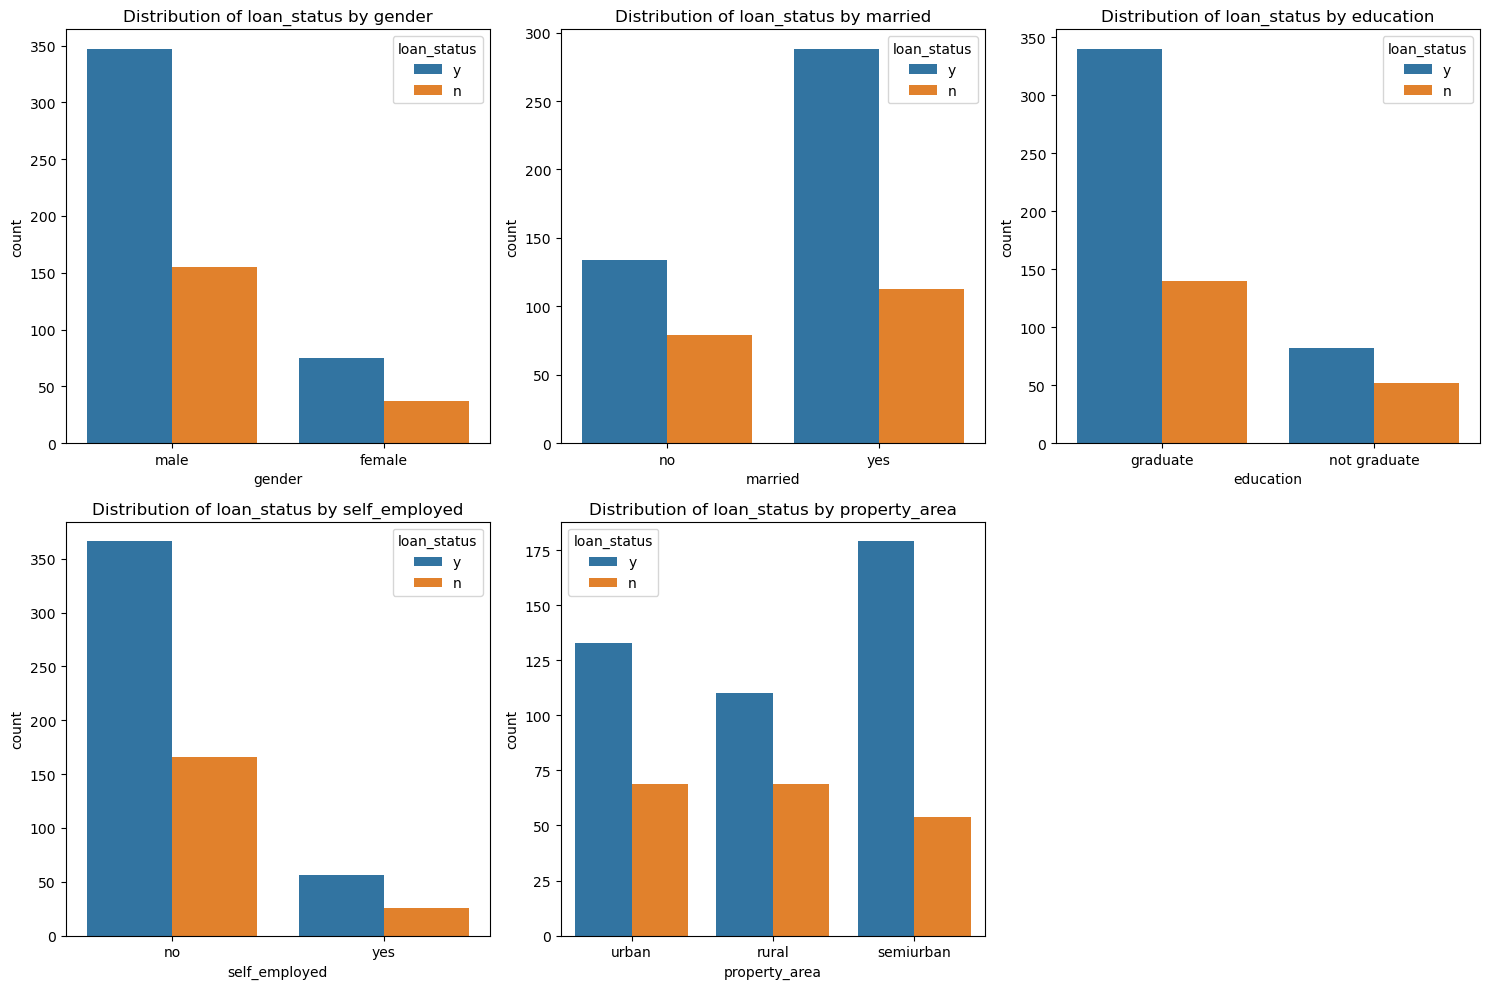

In [15]:
plt.figure(figsize=(15, 10))

# Define categorical features to visualize
categorical_features = ['gender', 'married', 'education', 'self_employed', 'property_area']

# Iterate over each categorical feature and create subplots
for i, feature in enumerate(categorical_features, start=1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='loan_status', data=df)
    plt.title(f'Distribution of loan_status by {feature}')

plt.tight_layout()
plt.show()

#### Observations:
- **gender**: The approval rate for males is notably higher compared to females.
- **married**: Married individuals exhibit a higher likelihood of loan approval compared to unmarried individuals.
- **education**: Graduates demonstrate a higher probability of loan approval in contrast to undergraduates.
- **self_employed**: Surprisingly, non-self-employed individuals show a higher approval rate, suggesting a possible preference towards employed applicants, possibly indicating stability.
- **property_area**: Semi-urban regions exhibit a higher propensity for loan approval compared to urban and rural areas, implying potential factors such as income stability or property value.

In [16]:
# Keeping a copy of the cleaned dataset.
dfc = df.copy()

#### 5. Encode the categorical data.

In [17]:
# Filter categorical columns:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']

# Print names of categorical columns
print("Categorical columns:", cat_cols)

Categorical columns: ['gender', 'married', 'education', 'self_employed', 'property_area', 'loan_status']


In [18]:
# Now Label Encoding the categorical variables
le = LabelEncoder()
for i in cat_cols:
    df[i] = df[[i]].apply(le.fit_transform).astype('int32')

df.head(3)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0.0,0,0,5849,0.0,128.0,360.0,1,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1,2,1


- All categorical columns have been successfully encoded into numerical values, making the dataset entirely numerical.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             614 non-null    int32  
 1   married            614 non-null    int32  
 2   dependents         614 non-null    float64
 3   education          614 non-null    int32  
 4   self_employed      614 non-null    int32  
 5   applicantincome    614 non-null    int64  
 6   coapplicantincome  614 non-null    float64
 7   loanamount         614 non-null    float64
 8   loan_amount_term   614 non-null    float64
 9   credit_history     614 non-null    int32  
 10  property_area      614 non-null    int32  
 11  loan_status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


In [20]:
# Converting data type of 'dependents', 'loan_amount_term', and 'loanamount' columns from float to integer
# Converting to integer as the values represent whole numbers and there is no fractional part.
df['dependents'] = df['dependents'].astype(int)
df['loan_amount_term'] = df['loan_amount_term'].astype(int)
df['loanamount'] = df['loanamount'].astype(int)

In [21]:
df.head(3)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,128,360,1,2,1
1,1,1,1,0,0,4583,1508.0,128,360,1,0,0
2,1,1,0,0,1,3000,0.0,66,360,1,2,1


#### 6. Separate the target and independent features and split the data into train and test.

In [22]:
# Separating the target variable (y) and independent features (X):
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [23]:
# Splitting the dataset into 70% train and 30% test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Print the shapes of the train and test data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (429, 11)
Shape of X_test: (185, 11)
Shape of y_train: (429,)
Shape of y_test: (185,)


#### 7. Build any classification model to predict the loan status of the customer and save your model using pickle.

In [24]:
# Function to fit and predict with a model
def fit_n_predict(model, X_train, X_test, y_train, y_test): 
    # Fit the model with train data
    model.fit(X_train, y_train)
    
    # Making prediction on test set
    pred = model.predict(X_test)
    
    # Calculating the accuracy score
    accuracy = accuracy_score(y_test, pred)
    
    return accuracy 

In [25]:
# Initializing the Models
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

# Stacking Classifier Initialization
estimators = [('rf', rf), ('knn', knn), ('gb', gb), ('adb', adb)]
sc = StackingClassifier(estimators=estimators, final_estimator=rf)

In [26]:
# DataFrame to store results
result = pd.DataFrame(columns=['Accuracy'])  # Initialize a DataFrame to store accuracy results

# Model Evaluation Loop
for model, model_name in zip([lr, nb, knn, dt, rf, adb, gb, sc],  # Iterate over each model and its name
                             ['Logistic Regression', 'Naive Bayes', 'KNN', 'Descision Tree',
                              'Random Forest', 'Ada Boost', 'Gradient Boost', 'Stacking']):  
    
    # Fit the model, make predictions, and calculate accuracy using the fit_n_predict function
    # and store the accuracy result in the result DataFrame
    result.loc[model_name] = fit_n_predict(model, X_train, X_test, y_train, y_test)


In [27]:
result

,Accuracy
Logistic Regression,0.827027
Naive Bayes,0.821622
KNN,0.627027
Descision Tree,0.729730
Random Forest,0.783784
Ada Boost,0.816216
Gradient Boost,0.810811
Stacking,0.794595


- With an accuracy score of 82.7%, Logistic Regression emerges as the top-performing model among those evaluated. Therefore, choosing Logistic Regression as our predictive model would be the most suitable approach for accurately predicting the loan status of customers in this scenario.

In [28]:
# Using Logistic Regression
lr = LogisticRegression()  # Initialize Logistic Regression model

# Fit the Logistic Regression model on the training data
lr.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Predicting on training and testing data:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculating Accuracy score for training and testing data:
accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
accuracy_test = metrics.accuracy_score(y_test, y_test_pred)

print("Accuracy score on training data:", accuracy_train)
print("Accuracy score on testing data:", accuracy_test)

Accuracy score on training data: 0.8018648018648019
Accuracy score on testing data: 0.827027027027027


#### Inference:
- The accuracy score on the training data is approximately 80.19%, indicating that the model performs well in predicting the loan status for the samples it was trained on. Similarly, the accuracy score on the testing data is approximately 82.70%, suggesting that the model generalizes well to unseen data and maintains its predictive performance.

- Overall, the consistency in accuracy scores between the training and testing datasets indicates that the model is robust and effectively learns patterns from the data without overfitting. This suggests that the Logistic Regression model is suitable for predicting the loan status of customers, demonstrating its reliability in real-world applications.

In [30]:
# Creating a pickle file for the model:
import pickle
# Dumping the model to a file
pickle.dump(lr, open('model.pkl', 'wb'))
print("Model pickled successfully")

Model pickled successfully


#### For further steps lets move to VS Code:

📝 Completed by **Shrikant Verma** 🚀
#### Happy Learning :)